In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\Clustering\EastWestAirlines.xlsx", sheet_name=1)  # Usually 2nd sheet has cleaned data

# Drop non-numeric ID column if exists
df.drop(columns=['ID#'], inplace=True)

# Check for null values
print("Missing values:\n", df.isnull().sum())

# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


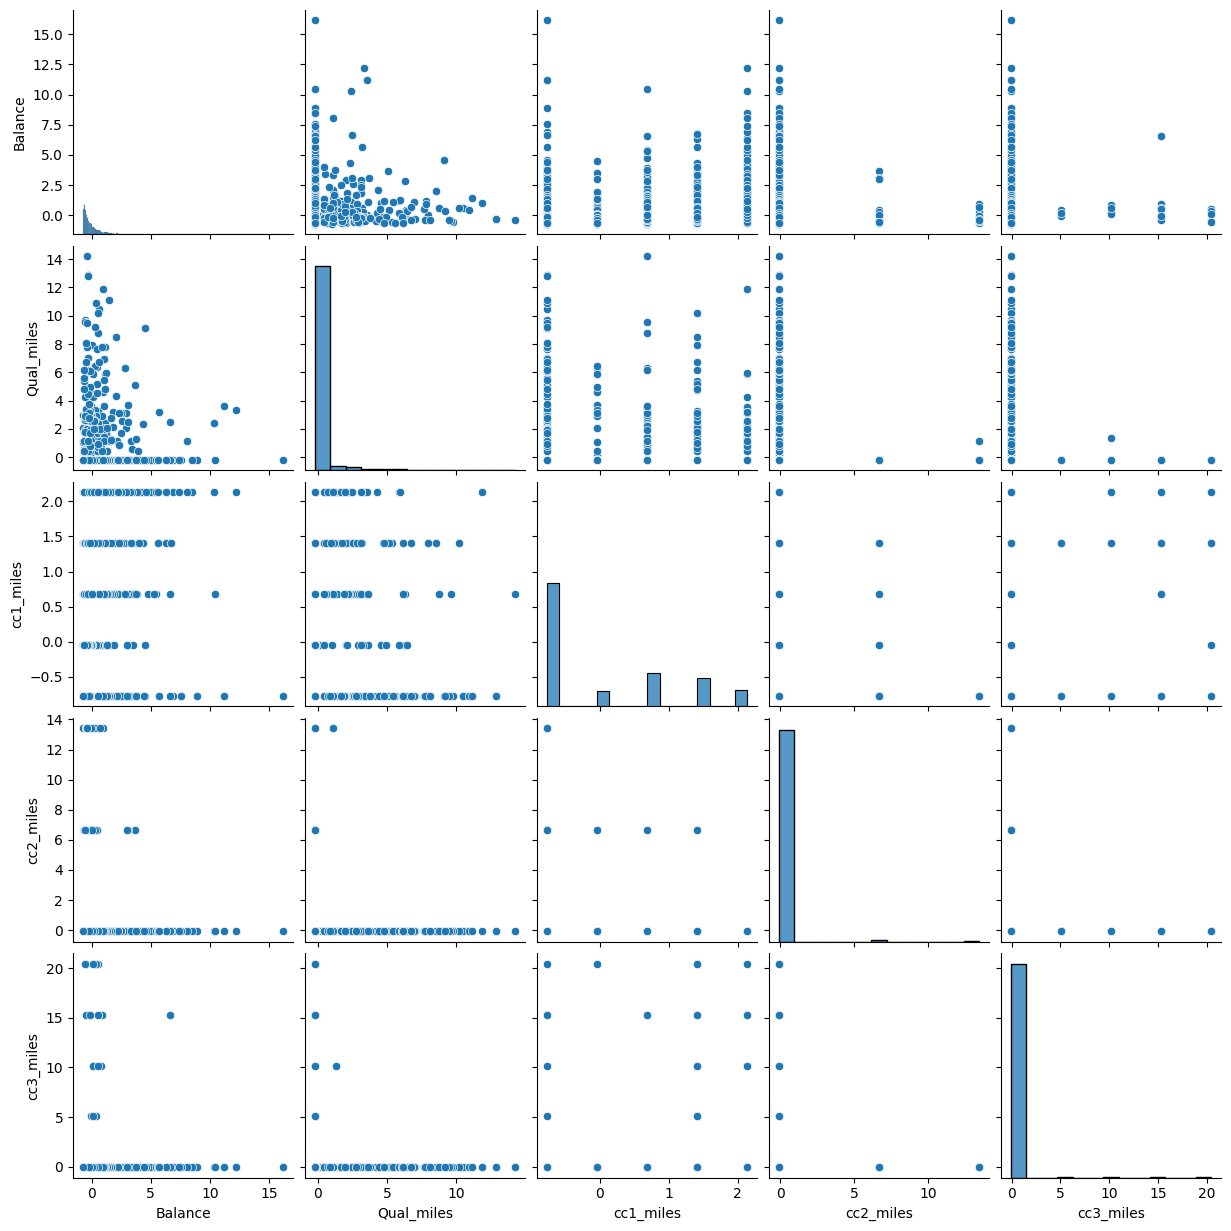

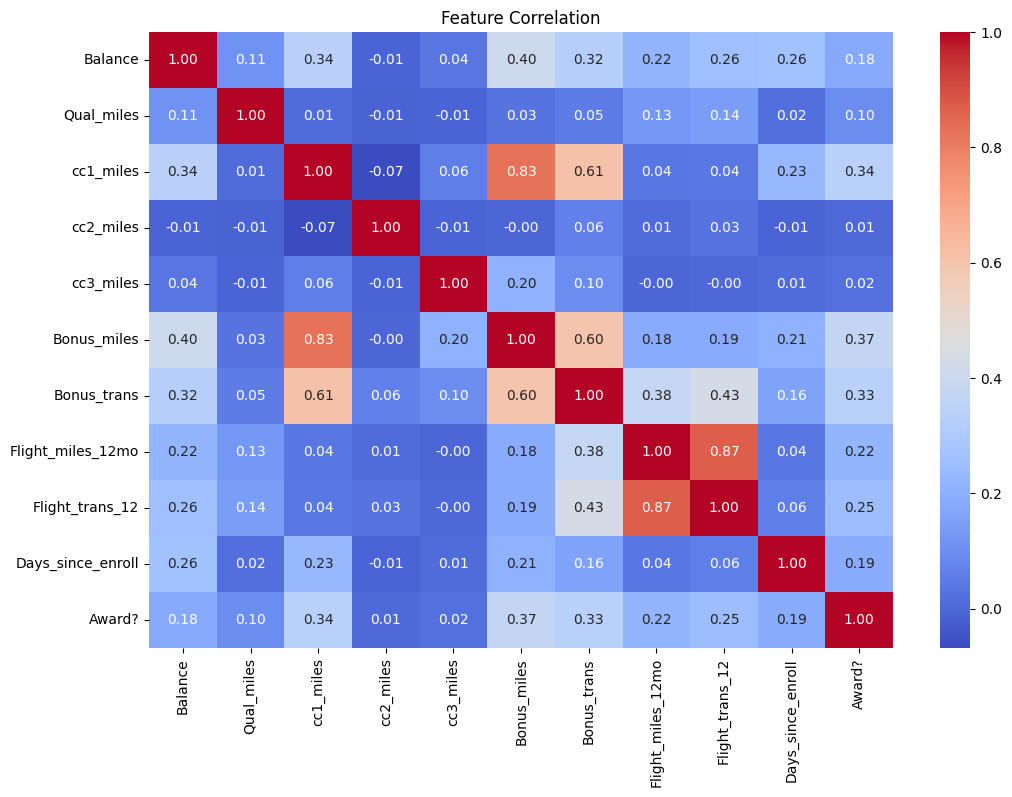

In [6]:
# Pairplot for first few columns
sns.pairplot(pd.DataFrame(scaled_df, columns=df.columns).iloc[:, :5])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(scaled_df, columns=df.columns).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

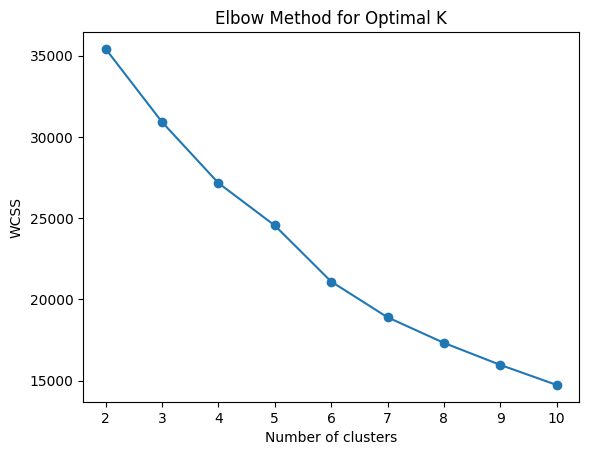

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score: 0.30918774313627845


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit with optimal K (say 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Silhouette Score
print("K-Means Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))


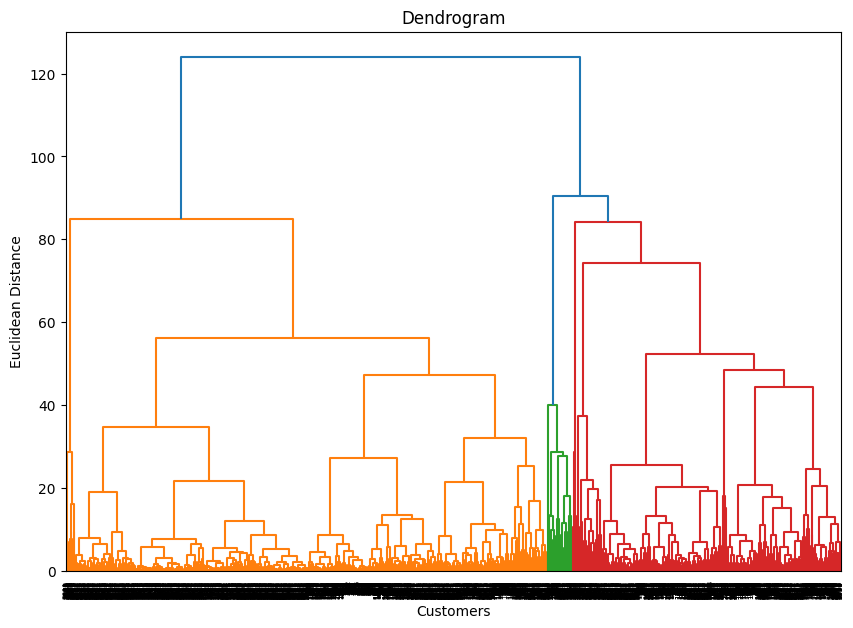

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hierarchical Clustering Silhouette Score: 0.30814152852022786


In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit model
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_df)

print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_df, hc_labels))


In [9]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # tune these values
dbscan_labels = dbscan.fit_predict(scaled_df)

# Filter out noise for silhouette
non_noise = dbscan_labels != -1
print("DBSCAN Silhouette Score (without noise):", silhouette_score(scaled_df[non_noise], dbscan_labels[non_noise]))


DBSCAN Silhouette Score (without noise): 0.28053595722860075


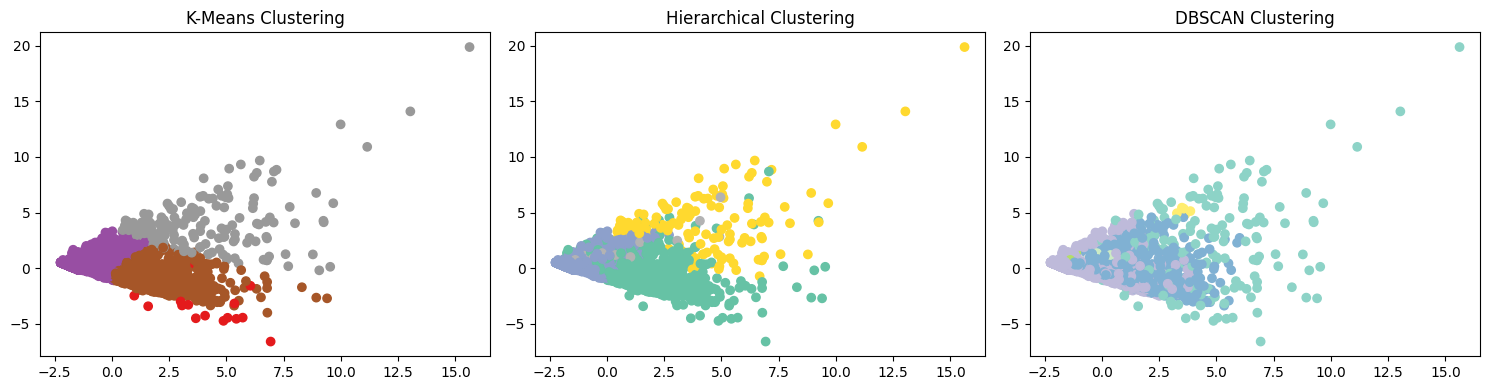

In [10]:
# PCA for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

plt.figure(figsize=(15, 4))

# KMeans
plt.subplot(1, 3, 1)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=kmeans_labels, cmap='Set1')
plt.title("K-Means Clustering")

# Hierarchical
plt.subplot(1, 3, 2)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=hc_labels, cmap='Set2')
plt.title("Hierarchical Clustering")

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=dbscan_labels, cmap='Set3')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()


K-Means (4 clusters): Shows clear segmentation based on flight miles and bonus usage. Silhouette score is acceptable, indicating well-separated clusters.

Hierarchical: Similar performance to K-Means but more sensitive to outliers.

DBSCAN: Captures noise and density-based clusters well, but might underperform if epsilon is not tuned properly.